In this case study we will do the following:

    Plotting - with Matplotlib and Seaborn and EDA
    Data manipulation - we will use pandas and numpy for all data formatting steps
    Classification models from sklearn library(logistic regression and regularization)
    K-Fold Cross validation, Grid Search(parameter tuning) and Feature selection algorithms
    
libraries we will be using are:
    
    pandas, seaborn, numpy, Dateutil, matplotlib, time, random

Business challenge - 

we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers company releases free version of their app with some of the main features unlocked.

our job is to find which users will most likely NOT enroll in the paid product, so that additional offers can be given to them. 

DATA - 

We have access to customer app behavior data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
fin = pd.read_csv(r'fintechappdata.csv')
fin.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
fin.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
fin['hour']= fin.hour.str.slice(1, 3).astype(int)

In [6]:
fin.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
findat = fin.copy().drop(columns = ['user', 'screen_list','enrolled_date','first_open','enrolled'])
findat.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

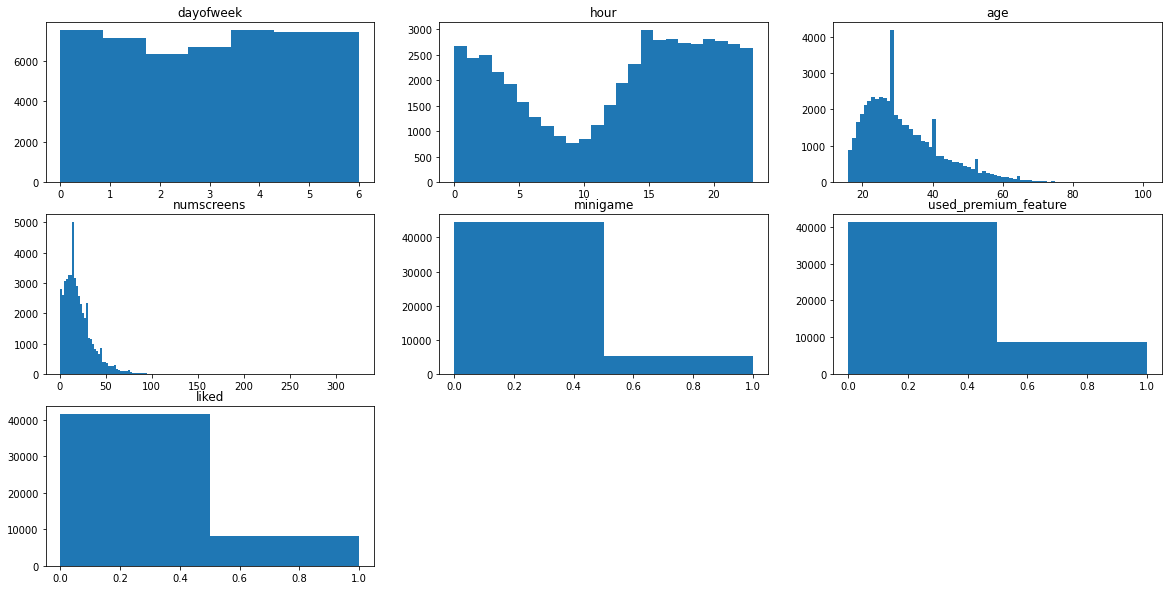

In [8]:
#We will try to plot histogram to get familiar with the dataset
plt.suptitle('Histogram of numerical columns', fontsize = 20)
plt.figure(figsize = (20,10))
for i in range(1, findat.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(findat.columns.values[i-1])
    
    vals = np.size(findat.iloc[: , i-1].unique())
    
    plt.hist(findat.iloc[: , i-1], bins = vals)
    

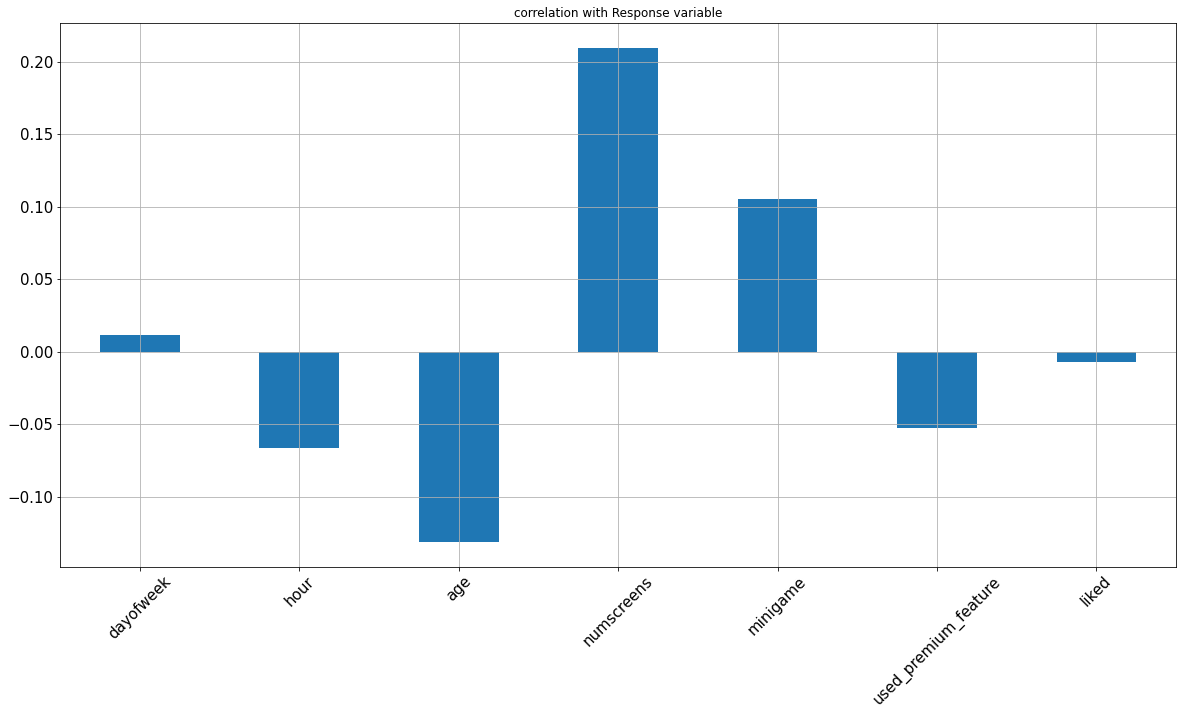

In [9]:
#Correlation plot

findat.corrwith(fin.enrolled).plot.bar(figsize = (20,10),
                                         title = 'correlation with Response variable',
                                         fontsize = 15, rot = 45,
                                         grid = True)

From the plot, it is clear that:

    higher the age, lesser likely they will subscribe or enroll
    numb screens is positively correlated, means more screen a person sees he is more likely to enroll
    likewise more times you play minigame, more likely you a person enrolls

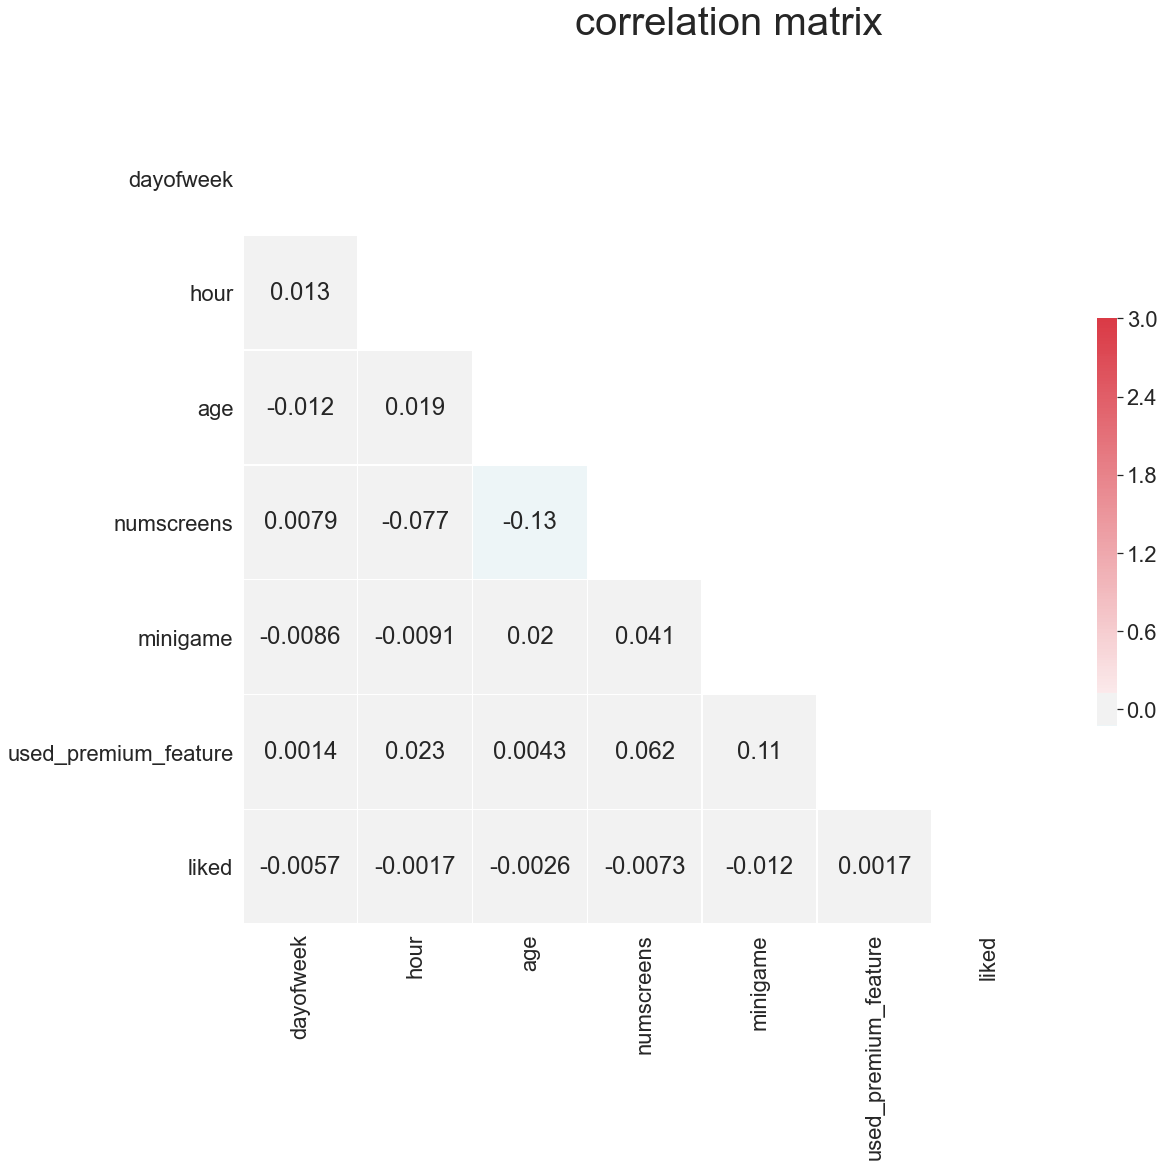

In [10]:
#Correlation matrix
sns.set(style = "white", font_scale = 2)

#compute the correlation matrix
corr = findat.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))
f.suptitle('correlation matrix', fontsize = 40)

#generate a custom diverging colormap
c_map = sns.diverging_palette(220,10, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = c_map, vmax = 3, center = 0, 
           square = True, annot=True, linewidth = 0.5, cbar_kws={"shrink": .5})

#### Feature engineering

In [11]:
fin.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
fin["first_open"] = [parser.parse(row_data) for row_data in fin["first_open"]]

In [14]:
fin["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in fin["enrolled_date"]]

In [15]:
fin.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [16]:
fin["difference"] = (fin.enrolled_date - fin.first_open).astype('timedelta64[h]')

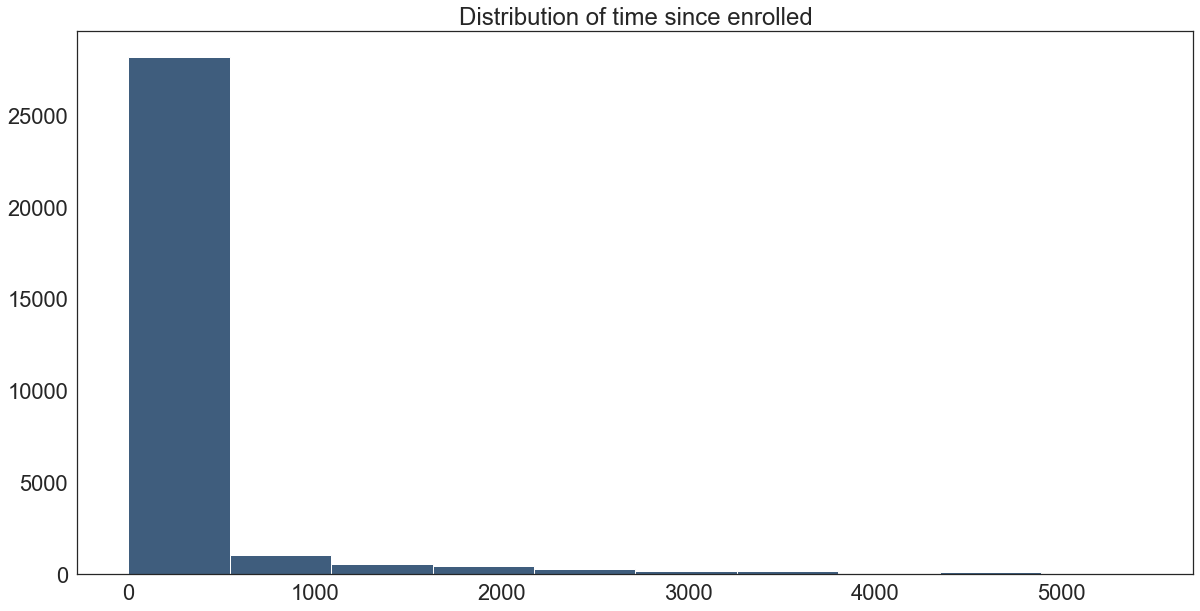

In [19]:
#Now we will plot

plt.figure(figsize=(20,10))
plt.hist(fin["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of time since enrolled')
plt.show()

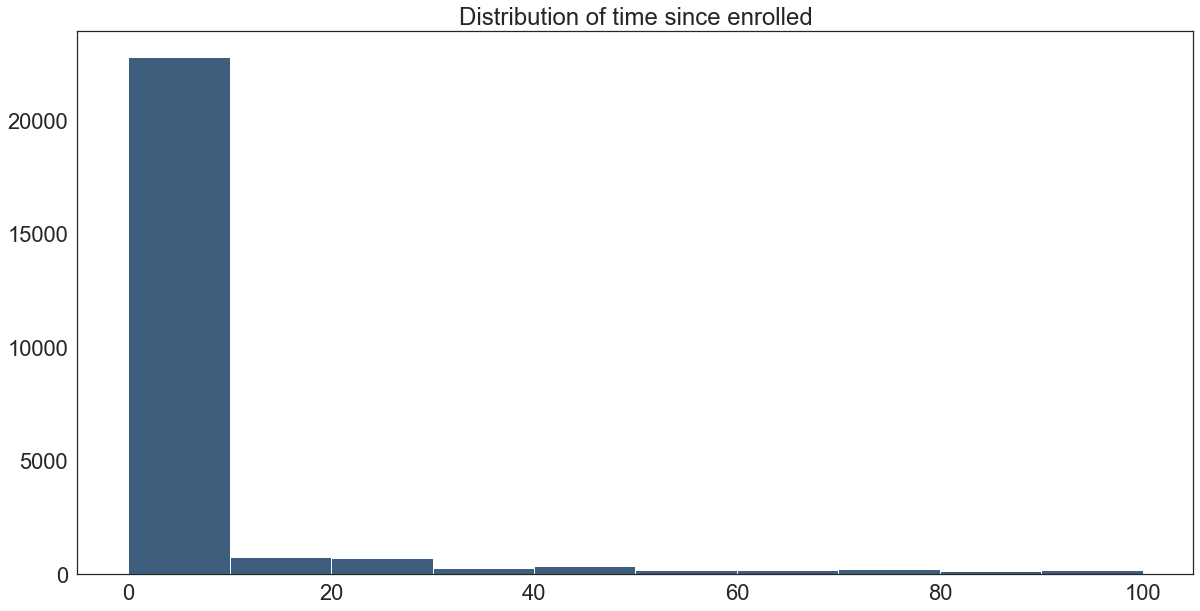

In [20]:
plt.figure(figsize=(20,10))
plt.hist(fin["difference"].dropna(), color = '#3F5D7D', range = [0,100])
plt.title('Distribution of time since enrolled')
plt.show()

In [21]:
fin.loc[fin.difference > 48, 'enrolled'] = 0

In [22]:
fin = fin.drop(columns = ['difference','enrolled_date','first_open'])

In [24]:
#Formatting the screen_list field

top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [25]:
fin["screen_list"] = fin.screen_list.astype(str) + ','

In [26]:
for sc in top_screens:
    fin[sc] = fin.screen_list.str.contains(sc).astype(int)
    fin["screen_list"] = fin.screen_list.str.replace(sc + ",", "")

In [27]:
fin["other"] = fin.screen_list.str.count(",")
fin = fin.drop(columns = ["screen_list"])

In [28]:
#Funnels
savings_screens = ["Saving1", "Saving2", "Saving2Amount","Saving4", "Saving5",
                  "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]

fin["SavingsCount"] = fin[savings_screens].sum(axis = 1)
fin = fin.drop(columns = savings_screens)

In [29]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
fin["CMCount"] = fin[cm_screens].sum(axis = 1)
fin = fin.drop(columns=cm_screens)

In [30]:
cc_screens = ["CC1", "CC1Category","CC3"]
fin["CCCount"] = fin[cc_screens].sum(axis=1)
fin = fin.drop(columns = cc_screens)

In [31]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
fin["LoansCount"] = fin[loan_screens].sum(axis=1)
fin = fin.drop(columns=loan_screens)

In [32]:
fin.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [35]:
fin.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [36]:
fin.to_csv("new_finappdata.csv", index = False)

#### Data pre-processing

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [38]:
dataset = pd.read_csv("new_finappdata.csv")

In [39]:
response = dataset["enrolled"]
dataset = dataset.drop(columns = 'enrolled')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, 
                                                   test_size = 0.2,
                                                   random_state = 0)

In [42]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

#### Model building

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')

In [50]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [53]:
cm

array([[3886, 1186],
       [1133, 3795]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.7681

In [55]:
precision_score(y_test, y_pred)

0.7618952017667135

In [56]:
recall_score(y_test, y_pred)

0.7700892857142857

In [57]:
f1_score(y_test, y_pred)

0.7659703300030276

test Accuracy: 0.7681


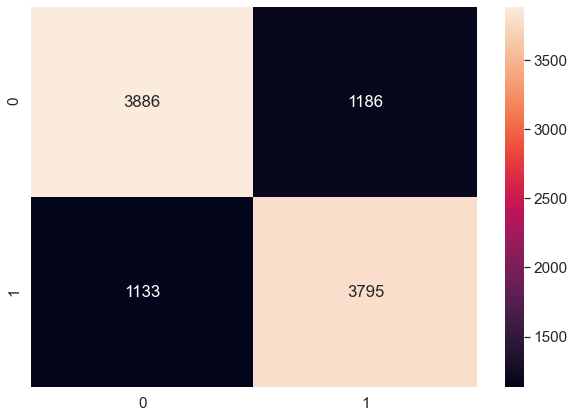

In [59]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print("test Accuracy: %0.4f"% accuracy_score(y_test, y_pred))

In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv = 10)

C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sadiqgpasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [64]:
print("Logistic Accuracy: %0.3f"%accuracies.mean())

Logistic Accuracy: 0.767


#### Conclusion

In [66]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [67]:
final_results['predicted_results'] = y_pred
final_results[['user','enrolled', 'predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


We have predicted 76.7% accurately the number of enrolled users. 